In [22]:
import cv2
import numpy as np
import mss
game_location = {'top': 275, 'left': 498, 'width': 343, 'height': 103}

In [23]:
cap = mss.mss()
raw = np.array(cap.grab(game_location))[:,:,:3].astype(np.uint8)
raw = np.mean(raw, axis=-1).astype(np.uint8)
_, raw = cv2.threshold(raw, 200, 255, cv2.THRESH_BINARY)

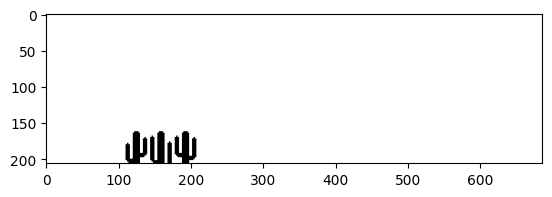

In [24]:
plt.imshow(raw, cmap="gray")

In [25]:
_, thresh = cv2.threshold(raw, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area = 250
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(raw, (x, y), (x + w, y + h), (0, 0, 0), -1)

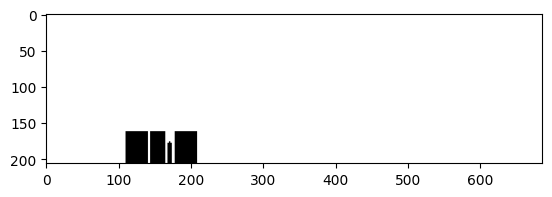

In [26]:
import matplotlib.pyplot as plt
plt.imshow(raw, cmap="gray")